In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/dog-vs-cat-classification
%pwd
parent_dir = "/content/drive/MyDrive/Colab Notebooks"



Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/dog-vs-cat-classification


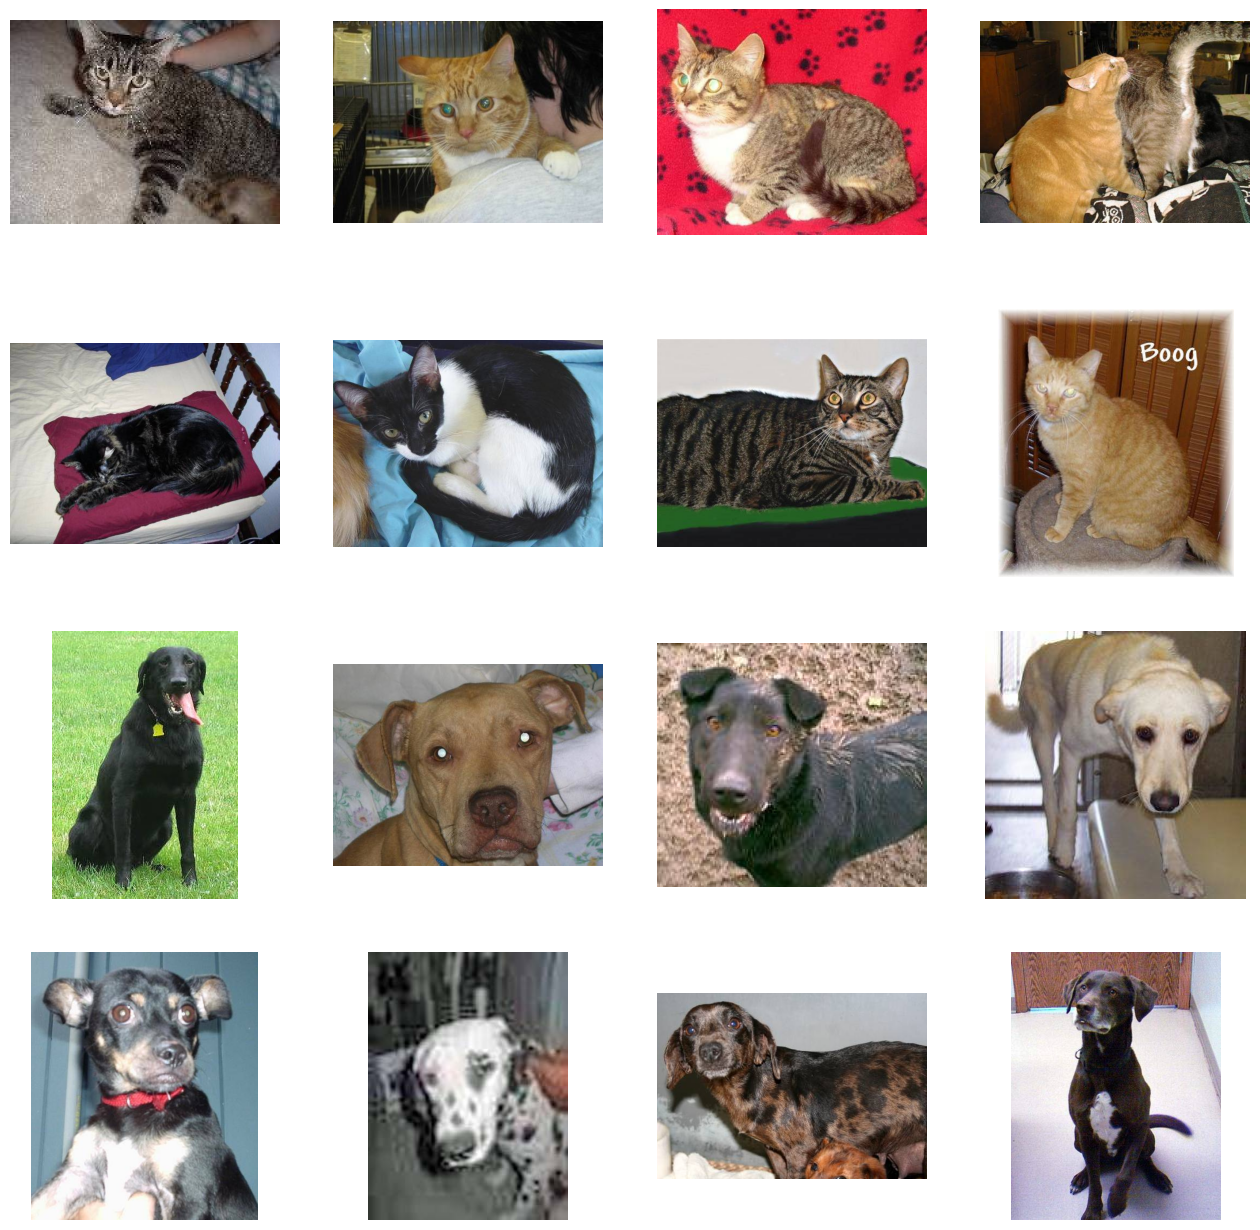

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join(parent_dir, "dog-vs-cat-classification", "cat")
dog_dir = os.path.join(parent_dir, "dog-vs-cat-classification", "dog")
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/dog-vs-cat-classification"

train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 25124 files belonging to 2 classes.
Using 22612 files for training.
Found 25124 files belonging to 2 classes.
Using 2512 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

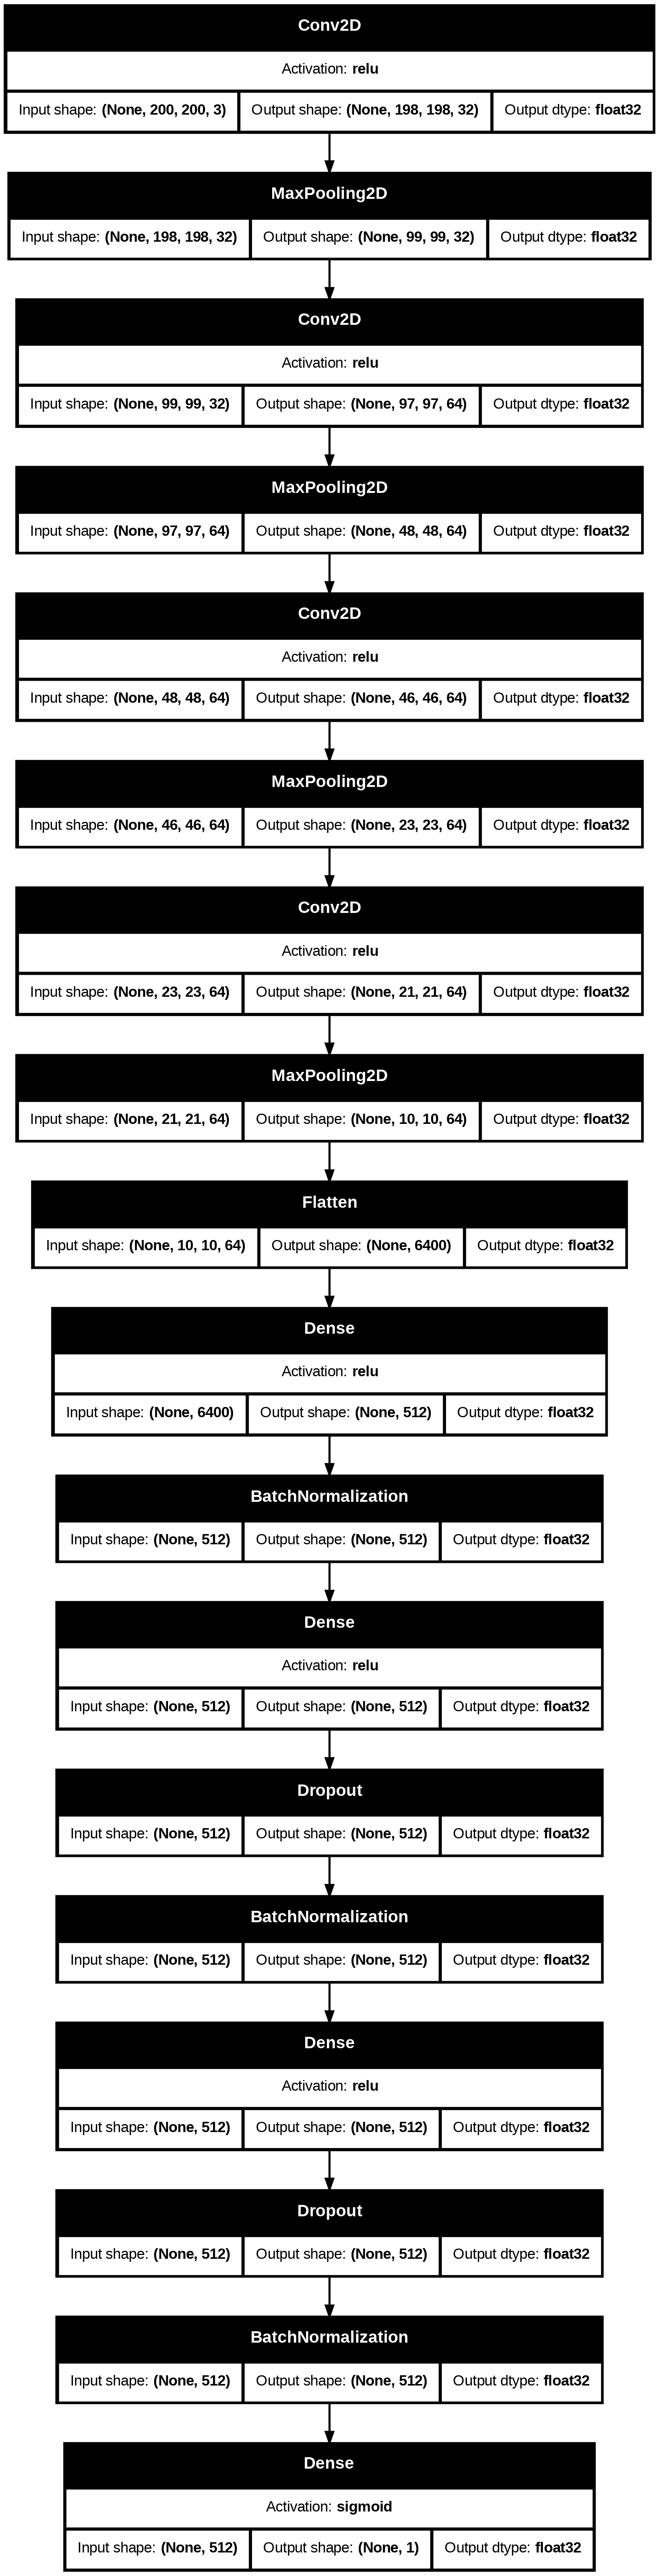

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)


Epoch 1/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 6093s 9s/step - accuracy: 0.5709 - loss: 0.7573 - val_accuracy: 0.6417 - val_loss: 0.6833
Epoch 2/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1955s 3s/step - accuracy: 0.7010 - loss: 0.5729 - val_accuracy: 0.4881 - val_loss: 4.2891
Epoch 3/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1932s 3s/step - accuracy: 0.6735 - loss: 0.5955 - val_accuracy: 0.5450 - val_loss: 0.9159
Epoch 4/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1891s 3s/step - accuracy: 0.7898 - loss: 0.4478 - val_accuracy: 0.7038 - val_loss: 0.5529
Epoch 5/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1892s 3s/step - accuracy: 0.7123 - loss: 0.5524 - val_accuracy: 0.6636 - val_loss: 0.6745
Epoch 6/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1884s 3s/step - accuracy: 0.7979 - loss: 0.4408 - val_accuracy: 0.7488 - val_loss: 0.5376
Epoch 7/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1830s 3s/step - accuracy: 0.8224 - loss: 0.3968 - val_accuracy: 0.8137 - val_loss: 0.4561
Epoch 8/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 1897s 3s/step - accuracy: 0.8130 - loss: 0.4058 - 

# New Section

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dog


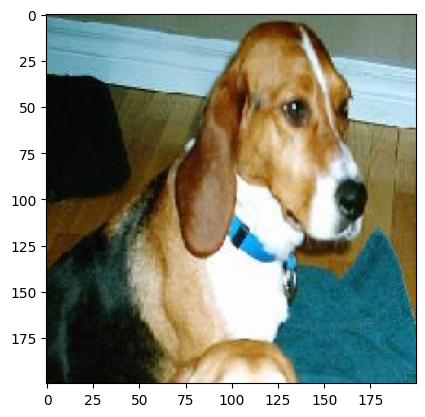

In [ ]:
from keras.preprocessing import image
import random

random_animal = random.randint(1,2)
random_number = random.randint(0,12000)

if random_animal == 1:
  animal = 'cat'
else:
  animal = 'dog'

image_path = f"/content/drive/MyDrive/Colab Notebooks/dog-vs-cat-classification/{animal}/{animal}.{random_number}.jpg"

test_image = image.load_img(image_path,target_size=(200,200))

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image)

i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")
